In [55]:

!pip install seaborn[stats]
!pip install voila 
!pip install openpyxl


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

def get_spending_by_country(_country, x, y):
    _df = df.loc[df['Pays'] == _country]
    get_lineplot_graph(_df, x, y, 'Évolution des dépenses culturelles des ménages en ' + _country)

def get_spending_by_countries(_countries, x, y):
    _df = pd.DataFrame(columns = df.columns)
    i = 0
    for index, row in df.iterrows():
        if(row['Pays'] in _countries):
            _df.loc[i] = row
            i += 1
    get_lineplot_graph(_df, x, y, 'Comparaison des dépenses culturelles des ménages')
            
def get_lineplot_graph(_df, x, y, title):
    spending = pd.melt(_df, id_vars=['Pays'], var_name='year', value_name='percent')
    graph = sns.lineplot(ax=axes[x, y], data=spending, x='year', y='percent', hue='Pays')
    graph.set(xlabel='Années', ylabel='% de dépenses', title=title)

def get_spending_by_year(_year, x, y):
    year = df[['Pays', _year]]
    get_barplot_graph(year, _year, x, y, 'Dépenses culturelles des ménages en Europe pour l\'année ' + str(_year))

def get_spending_by_period(x, y):
    _df = df.mean(axis=1, numeric_only=True).reset_index(name ='mean')
    _df = pd.concat([df[['Pays']], _df], axis=1)
    get_barplot_graph(_df, 'mean', x, y, 'Dépenses culturelles des ménages en Europe pour la période ' + str(df. columns[1]) + ' - '  + str(df. columns[len(df.columns) - 1]), False)

def get_barplot_graph(_df, _by, x, y, title, ascending=True):
    sorted = _df.sort_values(by=[_by], ascending=ascending)
    graph = sns.barplot(ax=axes[x, y], data=sorted, x=_by, y='Pays')
    graph.set(xlabel='% de dépenses', title=title )
    

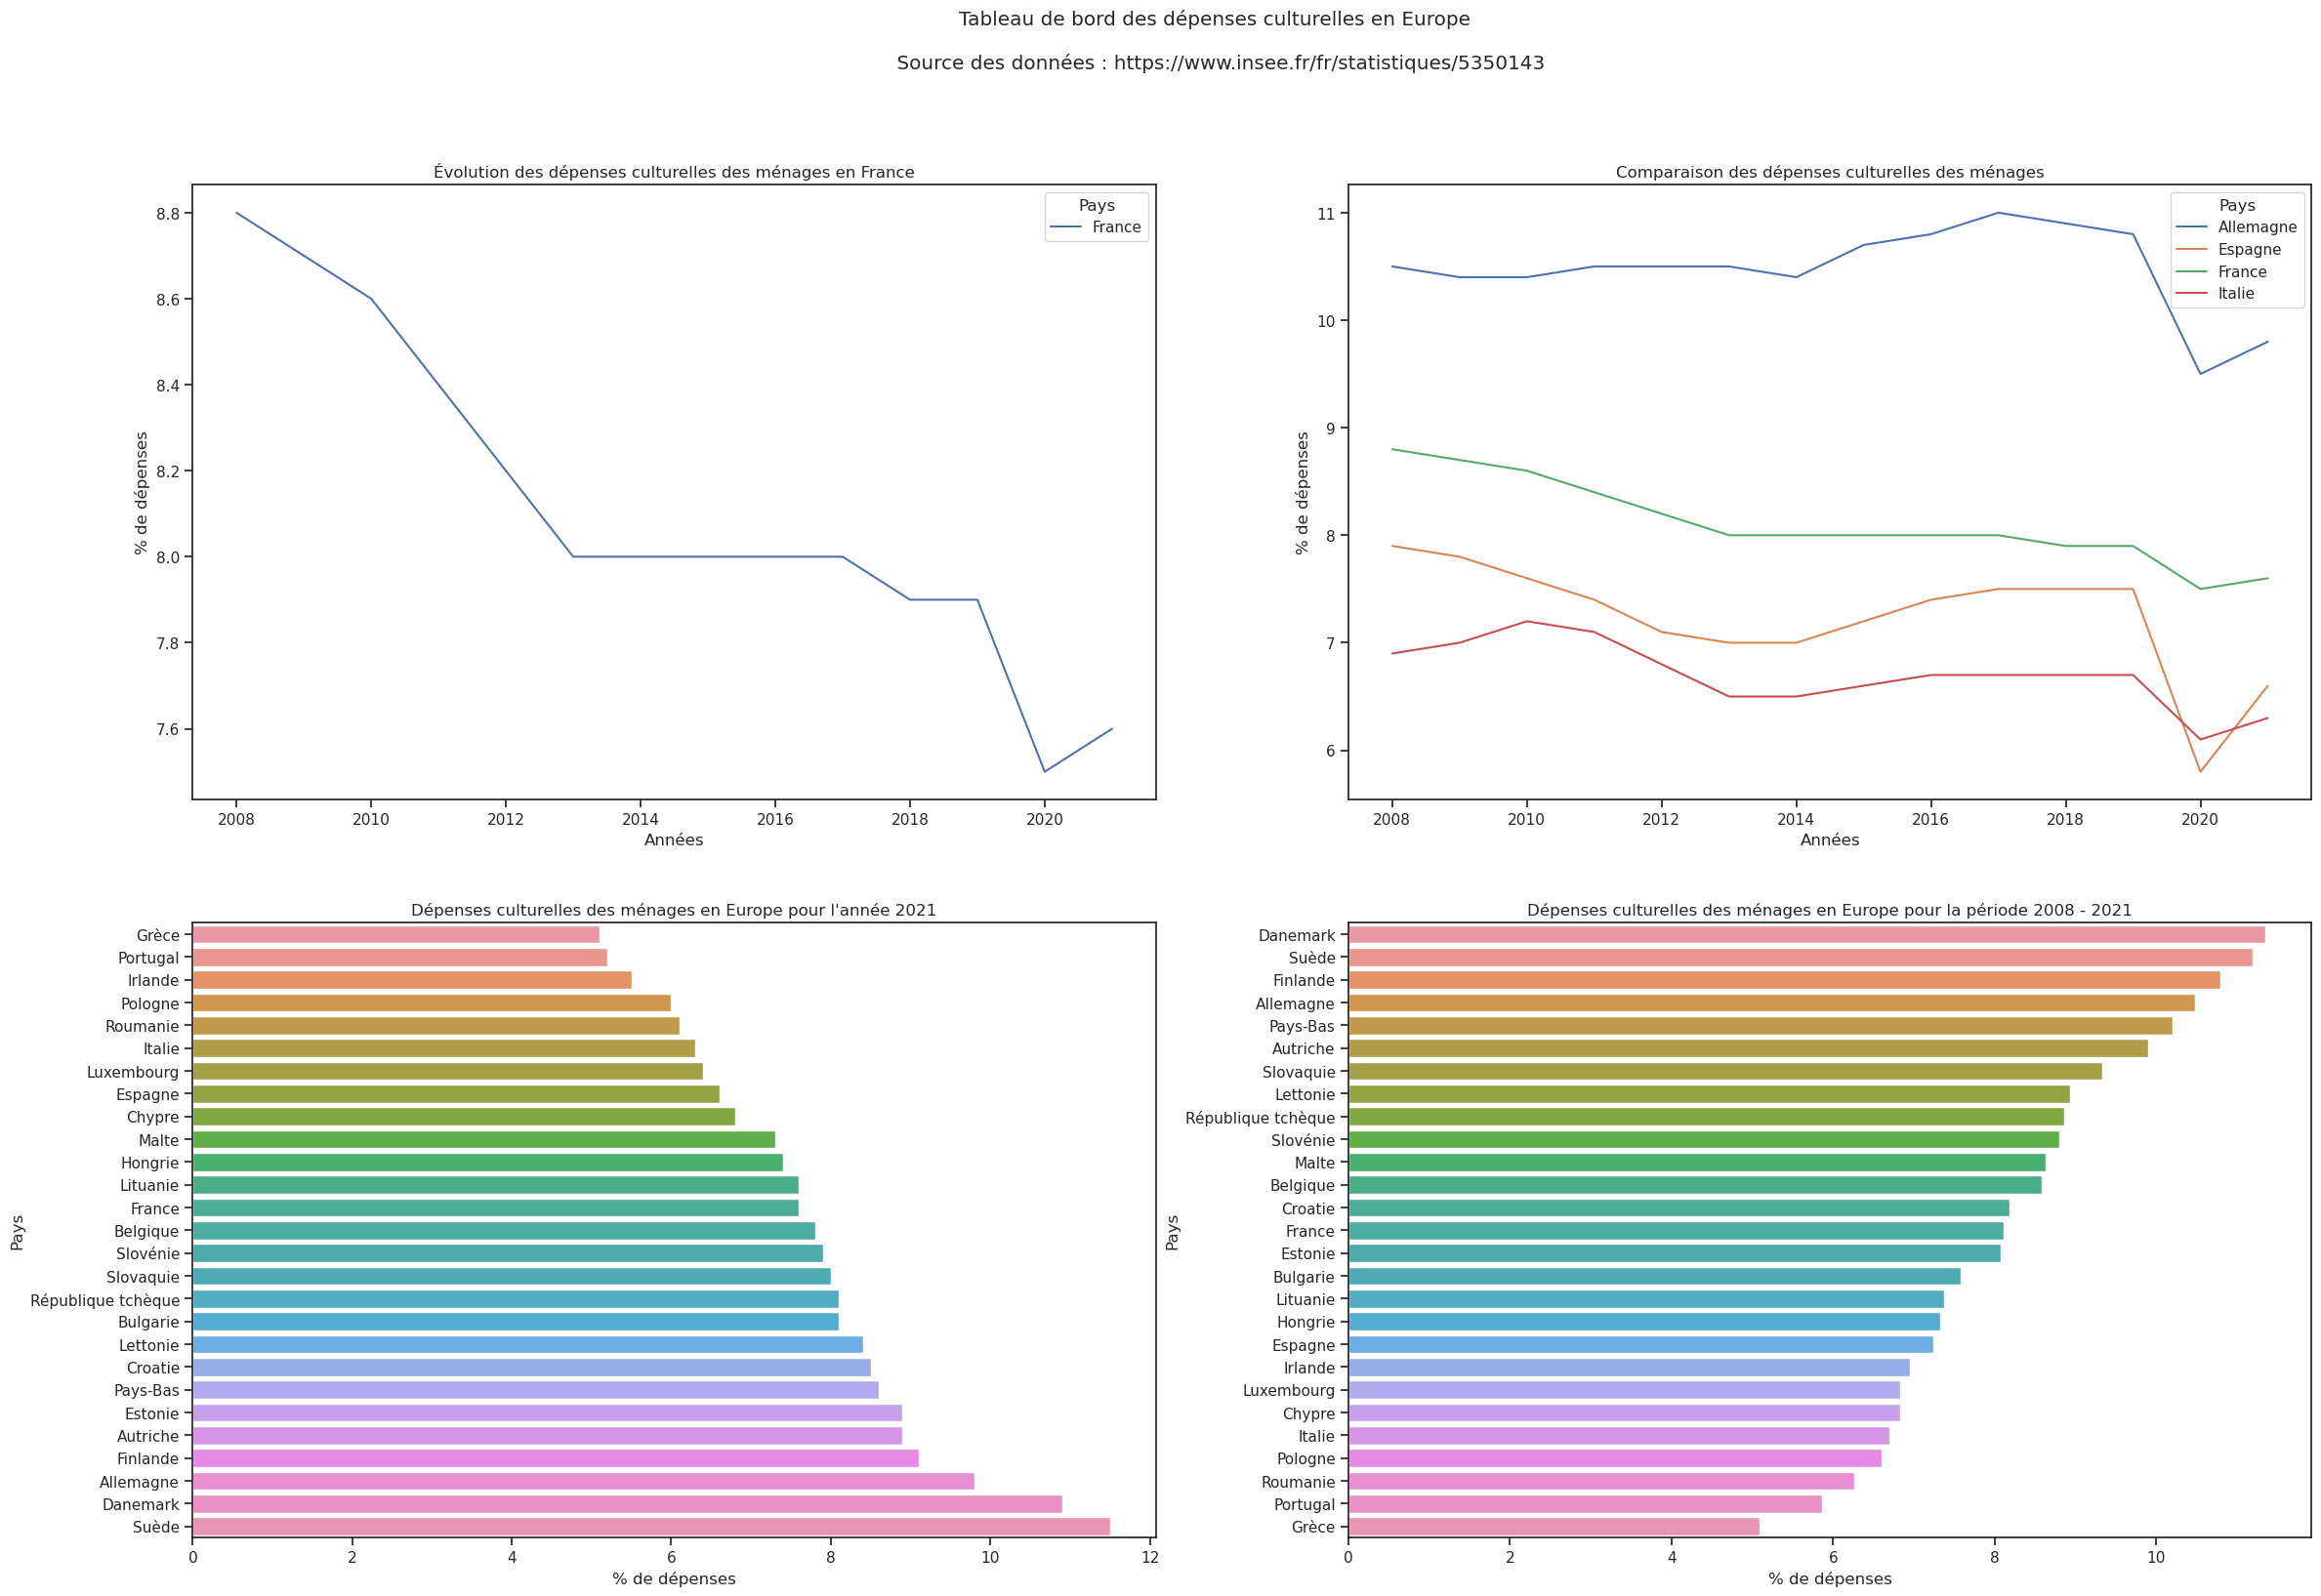

In [116]:

df = pd.read_excel('./cultural_spending_europe.xlsx', engine='openpyxl')

fig, axes = plt.subplots(2, 2, figsize=(30, 15))
fig.suptitle('Tableau de bord des dépenses culturelles en Europe \n\n Source des données : https://www.insee.fr/fr/statistiques/5350143')

get_spending_by_country('France', 0, 0)
get_spending_by_countries(['France', 'Allemagne', 'Espagne', 'Italie'], 0, 1)
get_spending_by_year(2021, 1, 0)
get_spending_by_period(1, 1)

# with CLI to display on localhost with voila 
# voila ./path_to_jupyter_notebook_file
